<a href="https://colab.research.google.com/github/ChrissyMarie/AerialSilksImageClassification/blob/main/AerialClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an image classification model that can detect 5 different poses commonly performed on aerial silks: the scorpion, double footlock splits, belay splits, gazelle, and crossback straddle.

In [1]:
import os
import zipfile
import random
import datetime
from packaging import version
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
#from plot_keras_history import plot_history

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


In [5]:
#suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Movements to classify:
  - Scorpion
  - Gazelle
  - Crossback Straddle
  - Double Footlock Split
  - Belay Split
  

In [7]:
print(len(os.listdir('./gdrive/MyDrive/AerialClassification/AerialTRAINING/Scorpion')))


52


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [11]:
TRAINING_DIR = "./gdrive/MyDrive/AerialClassification/AerialTRAINING/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=5,
                                                    target_size=(150, 150))

VALIDATION_DIR = "./gdrive/MyDrive/AerialClassification/AerialTESTING/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=5,
                                                              target_size=(150, 150))


Found 257 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [12]:
history = model.fit(train_generator, epochs=100,
                    validation_data=validation_generator, 
                    validation_steps=6,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)]
                    )

Epoch 1/100
52/52 [==============================] - 85s 2s/step - loss: 1.6624 - acc: 0.2607 - val_loss: 1.6047 - val_acc: 0.2667
Epoch 2/100
52/52 [==============================] - 22s 434ms/step - loss: 1.4239 - acc: 0.3774 - val_loss: 2.0089 - val_acc: 0.2667
Epoch 3/100
52/52 [==============================] - 21s 398ms/step - loss: 0.9608 - acc: 0.6537 - val_loss: 1.5329 - val_acc: 0.3000
Epoch 4/100
52/52 [==============================] - 20s 380ms/step - loss: 0.4476 - acc: 0.8638 - val_loss: 2.0347 - val_acc: 0.2667
Epoch 5/100
52/52 [==============================] - 20s 378ms/step - loss: 0.2276 - acc: 0.9222 - val_loss: 2.5997 - val_acc: 0.2667
Epoch 6/100
52/52 [==============================] - 20s 378ms/step - loss: 0.1404 - acc: 0.9650 - val_loss: 3.2696 - val_acc: 0.2667
Epoch 7/100
52/52 [==============================] - 19s 364ms/step - loss: 0.1263 - acc: 0.9611 - val_loss: 3.6206 - val_acc: 0.3667
Epoch 8/100
52/52 [==============================] - 20s 379ms/st

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

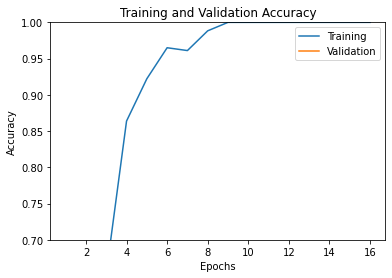

In [15]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

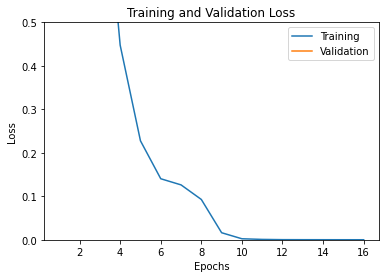

In [16]:
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 0.5])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
predictions = model.predict(validation_generator, validation_generator)

In [18]:
print('shape of preds: ', predictions.shape)

shape of preds:  (50, 5)


In [19]:
predictions[5]

array([0.002, 0.963, 0.003, 0.032, 0.   ], dtype=float32)